In [13]:
import pandas as pd
import numpy as np
import datetime
import itertools
import matplotlib.pyplot as plt

In [8]:
raw_data = pd.read_csv('../data/EMS_Incident_Dispatch_Data.csv',  error_bad_lines=False, sep=',')

/Users/rob/.local/share/virtualenvs/NYC-EMS-Time-Series-n4kV9ebg/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df = raw_data.drop(['FIRST_TO_HOSP_DATETIME', 'FIRST_HOSP_ARRIVAL_DATETIME', 'ATOM', 'CAD_INCIDENT_ID', 
                  'FIRST_ASSIGNMENT_DATETIME', 'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME',
                 'INCIDENT_CLOSE_DATETIME', 'INCIDENT_DISPATCH_AREA', 'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT',
                 'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT', 'REOPEN_INDICATOR', 'SPECIAL_EVENT_INDICATOR',
                 'TRANSFER_INDICATOR', 'INCIDENT_TRAVEL_TM_SECONDS_QY'], axis=1)

<BarContainer object of 6 artists>

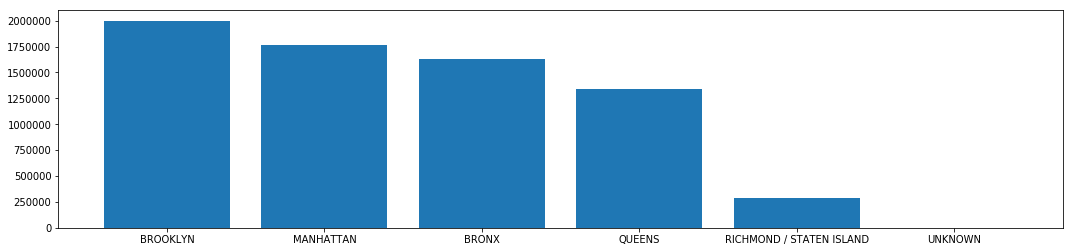

In [25]:
plt.figure(figsize=(18,4))
plt.bar(df['BOROUGH'].value_counts().index, df['BOROUGH'].value_counts())

In [26]:
df['INITIAL_SEVERITY_LEVEL_CODE'].value_counts()

2    1437005
4    1335194
5    1308187
6    1240666
3     866318
7     710719
1     102383
8      22679
9         74
Name: INITIAL_SEVERITY_LEVEL_CODE, dtype: int64

<BarContainer object of 9 artists>

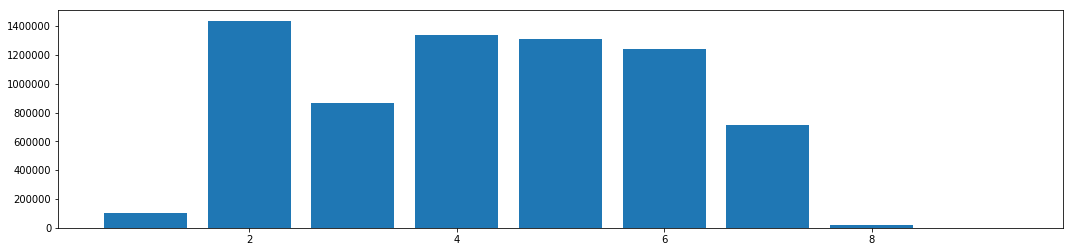

In [27]:
plt.figure(figsize=(18,4))
plt.bar(df['INITIAL_SEVERITY_LEVEL_CODE'].value_counts().index, df['INITIAL_SEVERITY_LEVEL_CODE'].value_counts())


In [28]:
df['FINAL_SEVERITY_LEVEL_CODE'].value_counts()

2    1522490
4    1287018
5    1274005
6    1147786
3     962250
7     662865
1     146536
8      20275
Name: FINAL_SEVERITY_LEVEL_CODE, dtype: int64

<BarContainer object of 8 artists>

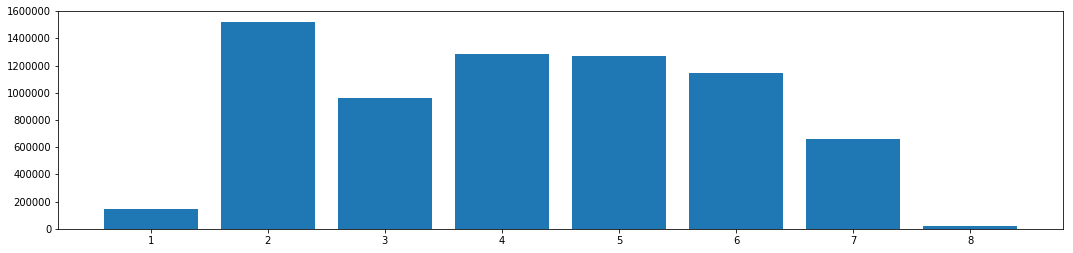

In [29]:
plt.figure(figsize=(18,4))
plt.bar(df['FINAL_SEVERITY_LEVEL_CODE'].value_counts().index, df['FINAL_SEVERITY_LEVEL_CODE'].value_counts())


In [30]:
delta_data = df[:]

In [31]:
delta_data['Change_In_Severity'] = dropped_data['INITIAL_SEVERITY_LEVEL_CODE'] - dropped_data['FINAL_SEVERITY_LEVEL_CODE']

/Users/rob/.local/share/virtualenvs/NYC-EMS-Time-Series-n4kV9ebg/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
delta_data.set_index('INCIDENT_DATETIME', inplace = True)

In [33]:
ts = pd.DataFrame(delta_data.index.value_counts()).sort_index()

In [ ]:
ts.sort_values('INCIDENT_DATETIME', ascending=False)

,INCIDENT_DATETIME
01/03/2015 08:15:02 PM,4
09/01/2016 05:39:57 PM,4
11/17/2013 11:34:14 AM,4
07/11/2013 12:26:30 AM,4
09/14/2014 05:52:30 PM,4
10/16/2016 11:33:21 AM,4
05/29/2016 12:28:43 PM,4
05/20/2017 09:08:41 AM,4
08/30/2015 10:01:07 PM,4
06/06/2014 02:23:17 PM,3


In [ ]:
ts.index = pd.to_datetime(ts.index)

In [ ]:
annual_freq = ts.groupby(Grouper(freq='A'))

In [ ]:
new_df = pd.DataFrame()
for yr, group in annual_freq:
    new_df[yr.year] = group.values.ravel()

In [ ]:
year_matrix = new_df.T
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

In [ ]:
ts.head()

In [ ]:
ts.loc['2016-02-29']

In [ ]:
leap_ts = ts[ts.index != '2016-02-29']

In [ ]:
annual_freq = leap_ts.groupby(Grouper(freq='A'))

In [ ]:
leap_df = pd.DataFrame()
for yr, group in annual_freq:
    leap_df[yr.year] = group.values.ravel()

In [ ]:
leap_df.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

In [ ]:
data.columns